## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 1


*****
Assignment 1 is worth 15% of the final grade. Submit the ipynb file and the generated pdf output file. Failing to submit both files will be subject to a mark deduction.
*****



### Preparation

The dataset is related to Forest Fires. For more info: https://archive.ics.uci.edu/ml/datasets/forest+fires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Q1.

Read the csv file from the this URL https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv. Save it to a data frame called Forest. Check the first five records. (10 points)
[Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


In [2]:
#The csv has a header (first row), which will automatically be used with this code

Forest = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
print(Forest.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


# Q2.
How many observations are there in the dataset? How many observations are there with both a significant fire (burned area > 0) and rain? (10 points) [Relevent API1](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html) , [Relevant Pandas API 2](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#)

In [3]:
Forest.shape
#There are 517 observations in the Forest dataset

(517, 13)

In [4]:
filteredForest = Forest[(Forest["area"] > 0) & (Forest["rain"] > 0)]
filteredForest.shape
#Only two observations had both significant/any burn area AND rain fall
#suggesting that I could investigate an association between low rain fall and fires in future analysis

(2, 13)

# Q3.
Show the columns month, day, area of all the observations with a significant fire (burned area >0 ). (10 points) [Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [5]:
sigFireForest = Forest.loc[Forest["area"] > 0, ["month", "day", "area"]]
print(sigFireForest)
#There are 270 observations for significant fires in the dataset

    month  day   area
138   jul  tue   0.36
139   sep  tue   0.43
140   sep  mon   0.47
141   aug  wed   0.55
142   aug  fri   0.61
..    ...  ...    ...
509   aug  fri   2.17
510   aug  fri   0.43
512   aug  sun   6.44
513   aug  sun  54.29
514   aug  sun  11.16

[270 rows x 3 columns]


# Q4.
How large are the five largest fires (i.e. having largest area)? (10 points) [Relevant API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

In [6]:
sortedForest = Forest.sort_values(by="area", ascending=False)
sortedForest.head()
#The five largest fires range from 1090.84 to 200.94 hectares

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94


# Q5.
For the records you obtained from the previous question, what are the corresponding month, temp, RH, wind, rain, area? (10 points)

In [7]:
sortedForest.loc[:, ["month", "temp", "RH", "wind", "rain", "area"]].head()
#The largest five forest fires all occured between July and September, with no associated rainfall
#Temperatures ranged from 27.5 to 18.2 degrees, and relative humidity between 27 to 57%
#Wind speeds ranges from 4.9 to 1.8 km/hour

,month,temp,RH,wind,rain,area
238,sep,25.1,27,4.0,0.0,1090.84
415,aug,27.5,27,4.9,0.0,746.28
479,jul,22.6,57,4.9,0.0,278.53
237,sep,18.8,40,2.2,0.0,212.88
236,sep,18.2,46,1.8,0.0,200.94


# Q6.
For the whole dataset, reorder factor levels of month to be from Jan to Dec. (10 points)

In [8]:
Forest.month.dtype
#The month column is a string, and will need to be changed to a categorical variable

dtype('O')

In [10]:
month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
#specifying the order of the months

In [11]:
Forest["month"] = pd.Categorical(Forest["month"], categories = month_order, ordered = True)
monthForest = Forest.sort_values(by="month")
#converting month column from string to categorical data with the month order, then ordering by month

print(monthForest)

     X  Y month  day  FFMC   DMC     DC  ISI  temp   RH  wind  rain   area
104  2  4   jan  sat  82.1   3.7    9.3  2.9   5.3   78   3.1   0.0   0.00
379  4  5   jan  sun  18.7   1.1  171.4  0.0   5.2  100   0.9   0.0   0.00
96   3  4   feb  sat  83.9   8.0   30.2  2.6  12.7   48   1.8   0.0   0.00
59   2  2   feb  fri  86.6  13.2   43.0  5.3  12.3   51   0.9   0.0   0.00
202  7  4   feb  sun  83.9   8.7   32.1  2.1   8.8   68   2.2   0.0  13.05
..  .. ..   ...  ...   ...   ...    ...  ...   ...  ...   ...   ...    ...
274  8  6   dec  wed  84.0  27.8  354.6  5.3   5.1   61   8.0   0.0  11.19
281  6  5   dec  tue  85.4  25.4  349.7  2.6   5.1   24   8.5   0.0  24.77
273  4  6   dec  sun  84.4  27.2  353.5  6.8   4.8   57   8.5   0.0   8.98
279  4  4   dec  mon  85.4  25.4  349.7  2.6   4.6   21   8.5   0.0   9.77
278  4  4   dec  mon  85.4  25.4  349.7  2.6   4.6   21   8.5   0.0  22.03

[517 rows x 13 columns]


In [12]:
monthForest.month.dtype
#checking to make sure the month column is actually categorical and ordered, just in case

CategoricalDtype(categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
                  'sep', 'oct', 'nov', 'dec'],
, ordered=True)

# Q7.
Add one column to the data indicating whether a fire occurred for each observation ('TRUE' for area>0 and 'FALSE' for area==0). (10 points)

In [13]:
#create a simple for loop
def fireLoop(area):
  if area > 0:
    return "TRUE"
  else:
    return "FALSE"

In [14]:
Forest["fire"] = Forest["area"].apply(fireLoop)
print(Forest)
#there are now 14 columns, with the last column (fire) containing a boolean value

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

      fire  
0    FALSE  
1    FALSE  
2    FALSE  

# Q8.
What is the mean area/wind/temp/RH per month? (10 points)

In [38]:
meanForest = Forest.loc[:, ["month", "area", "wind", "temp", "RH"]]
print(meanForest)
#creating smaller dataframe with columns of interest

    month   area  wind  temp  RH
0     mar   0.00   6.7   8.2  51
1     oct   0.00   0.9  18.0  33
2     oct   0.00   1.3  14.6  33
3     mar   0.00   4.0   8.3  97
4     mar   0.00   1.8  11.4  99
..    ...    ...   ...   ...  ..
512   aug   6.44   2.7  27.8  32
513   aug  54.29   5.8  21.9  71
514   aug  11.16   6.7  21.2  70
515   aug   0.00   4.0  25.6  42
516   nov   0.00   4.5  11.8  31

[517 rows x 5 columns]


In [16]:
meanForest.groupby("month").mean()
#calculating the mean for area, wind, temp, and RH, grouped by month

,area,wind,temp,RH
month,,,,
jan,0.000000,2.000000,5.250000,89.000000
feb,6.275000,3.755000,9.635000,55.700000
mar,4.356667,4.968519,13.083333,40.000000
apr,8.891111,4.666667,12.044444,46.888889
may,19.240000,4.450000,14.650000,67.000000
jun,5.841176,4.135294,20.494118,45.117647
jul,14.369687,3.734375,22.109375,45.125000
aug,12.489076,4.086413,21.631522,45.489130
sep,17.942616,3.557558,19.612209,42.843023


# Q9.
How many observations are there in each month? Visualize by using a barplot in descending order. (10 points) [Relevant API 1](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) [Relevant API  2](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

In [54]:
monthCount = Forest["month"].value_counts(sort=True)
print(monthCount)
#an initial check of the data, to ensure I code the barplot correctly
#I technically didn't need this step, and would not share this with a client, but I like being careful

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64


Text(0, 0.5, 'Observations')

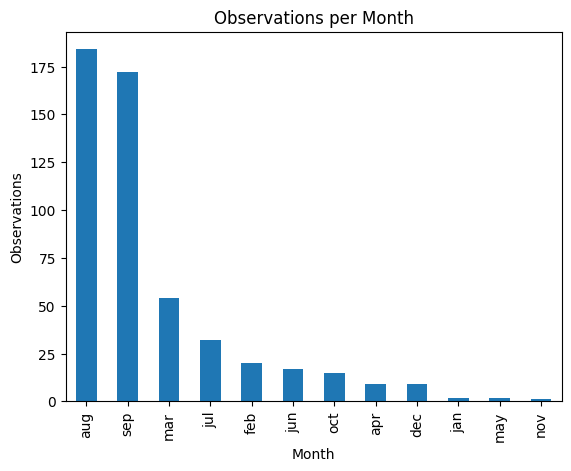

In [63]:
figOne=Forest["month"].value_counts().plot(kind='bar', title="Observations per Month")
figOne.set_xlabel("Month")
figOne.set_ylabel("Observations")

# Q10.
How many observations are there with burned area greater than zero in each month? Visualize by using a barplot in descending order. (10 points)

Text(0, 0.5, 'Fires')

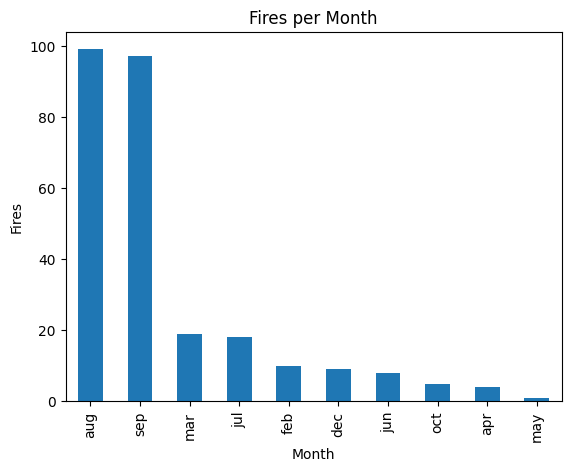

In [64]:
#Since I already created a subset of the database with any burn areas greater than zero,
#I can use that for this question

figTwo=sigFireForest["month"].value_counts().plot(kind='bar', title="Fires per Month")
figTwo.set_xlabel("Month")
figTwo.set_ylabel("Fires")

This is the end of Assignment 1

Ceni Babaoglu, PhD